In [495]:
import pandas as pd

In [496]:
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [497]:
data.columns = data.columns.str.lower().str.replace(' ','_')
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [498]:
data.value_counts().sum()

10000

In [499]:
data.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [500]:
#change dtype of customers to leave bank
data.exited = data.exited.map({
    1:'No', 0: 'Yes'
})
data.hascrcard = data.hascrcard.map({
    1:'Yes', 0:'No'
})
data.isactivemember = data.isactivemember.map({
    1:'Yes', 0:'No'
})

In [501]:
data.exited.value_counts()

exited
Yes    7963
No     2037
Name: count, dtype: int64

In [502]:
data.hascrcard.value_counts()

hascrcard
Yes    7055
No     2945
Name: count, dtype: int64

In [503]:
data.isactivemember.value_counts()

isactivemember
Yes    5151
No     4849
Name: count, dtype: int64

In [504]:
data.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,No
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,Yes
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,No
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,Yes
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,Yes


In [505]:
data.describe().round(2)

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,estimatedsalary
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,100090.24
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,57510.49
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,11.58
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,51002.11
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,100193.92
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,149388.25
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,199992.48


In [506]:
data.dtypes

rownumber            int64
customerid           int64
surname             object
creditscore          int64
geography           object
gender              object
age                  int64
tenure               int64
balance            float64
numofproducts        int64
hascrcard           object
isactivemember      object
estimatedsalary    float64
exited              object
dtype: object

Predicting customer churn targeting exited column

In [507]:
data_exited = data.groupby(['customerid'])['exited'].sum().reset_index()

In [508]:
data_exited.values

array([[15565701, 'Yes'],
       [15565706, 'No'],
       [15565714, 'Yes'],
       ...,
       [15815656, 'No'],
       [15815660, 'Yes'],
       [15815690, 'Yes']], dtype=object)

In [509]:
from sklearn.model_selection import train_test_split

In [510]:
#spliting data for training
data_train, data_test = train_test_split(data, test_size=0.2,random_state=1)
data_train, data_val = train_test_split(data_train, test_size=0.25, random_state=1)

In [511]:
#x data
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)

In [512]:
#y data
y_train = data_train.exited.values
y_test = data_test.exited.values
y_val = data_val.exited.values

In [513]:
data_train.shape, data_test.shape, data_val.shape

((6000, 14), (2000, 14), (2000, 14))

In [514]:
y_train.shape, y_test.shape, y_val.shape

((6000,), (2000,), (2000,))

In [515]:
del data_train['exited']
del data_test['exited']
del data_val['exited']

In [516]:
data_train.shape, data_test.shape, data_val.shape

((6000, 13), (2000, 13), (2000, 13))

In [517]:
data.nunique()

rownumber          10000
customerid         10000
surname             2932
creditscore          460
geography              3
gender                 2
age                   70
tenure                11
balance             6382
numofproducts          4
hascrcard              2
isactivemember         2
estimatedsalary     9999
exited                 2
dtype: int64

In [518]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [519]:
dv = DictVectorizer(sparse=False)

In [520]:
train_dicts = data_train.to_dict(orient = 'records')

In [521]:
X_train = dv.fit_transform(train_dicts)
X_train

array([[3.2000000e+01, 6.9423520e+04, 7.8900000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 7.0000000e+00],
       [4.1000000e+01, 7.7647600e+04, 5.8300000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 5.0000000e+00],
       [3.5000000e+01, 1.3225322e+05, 7.6700000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 6.0000000e+00],
       ...,
       [6.2000000e+01, 1.3107842e+05, 7.1000000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 3.0000000e+00],
       [3.3000000e+01, 0.0000000e+00, 6.8500000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 6.0000000e+00],
       [5.3000000e+01, 0.0000000e+00, 5.9400000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 4.0000000e+00]])

In [522]:
#Validation feature matrix
val_dicts = data_val.to_dict(orient = 'records')
X_val = dv.transform(val_dicts)


In [523]:
#Train using logistic regression model
lr = LogisticRegression(solver='liblinear', max_iter = 1000, random_state=1)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict_proba(X_val)[:,1]
y_pred_lr


array([0.78457262, 0.7817743 , 0.73320163, ..., 0.75953964, 0.79580401,
       0.72404524])

In [524]:
from sklearn.metrics import roc_auc_score

In [525]:
roc_auc_score_lr = roc_auc_score(y_val, y_pred_lr)

In [526]:
#Feature Importance
feature_names = dv.get_feature_names_out()
coefficients = lr.coef_[0]
feature_importance = dict(zip(feature_names, coefficients.round(2)))
feature_importance

{'age': -0.0,
 'balance': -0.0,
 'creditscore': 0.0,
 'customerid': 0.0,
 'estimatedsalary': -0.0,
 'gender=Female': -0.0,
 'gender=Male': 0.0,
 'geography=France': 0.0,
 'geography=Germany': -0.0,
 'geography=Spain': 0.0,
 'hascrcard=No': -0.0,
 'hascrcard=Yes': 0.0,
 'isactivemember=No': -0.0,
 'isactivemember=Yes': 0.0,
 'numofproducts': 0.0,
 'rownumber': 0.0,
 'surname=Abazu': 0.0,
 'surname=Abbie': 0.0,
 'surname=Abbott': -0.0,
 'surname=Abdullah': -0.0,
 'surname=Abdulov': 0.0,
 'surname=Abernathy': 0.0,
 'surname=Abramov': -0.0,
 'surname=Abramova': -0.0,
 'surname=Abramovich': -0.0,
 'surname=Abramowitz': 0.0,
 'surname=Achebe': 0.0,
 'surname=Adams': 0.0,
 'surname=Adamson': 0.0,
 'surname=Afamefula': 0.0,
 'surname=Afamefuna': 0.0,
 'surname=Afanasyeva': -0.0,
 'surname=Agafonova': 0.0,
 'surname=Ah Mouy': 0.0,
 'surname=Ahern': 0.0,
 'surname=Ahmed': 0.0,
 'surname=Aiken': 0.0,
 'surname=Aitken': 0.0,
 'surname=Ajuluchukwu': -0.0,
 'surname=Akabueze': -0.0,
 'surname=Akhtar

In [528]:
import matplotlib.pyplot as plt

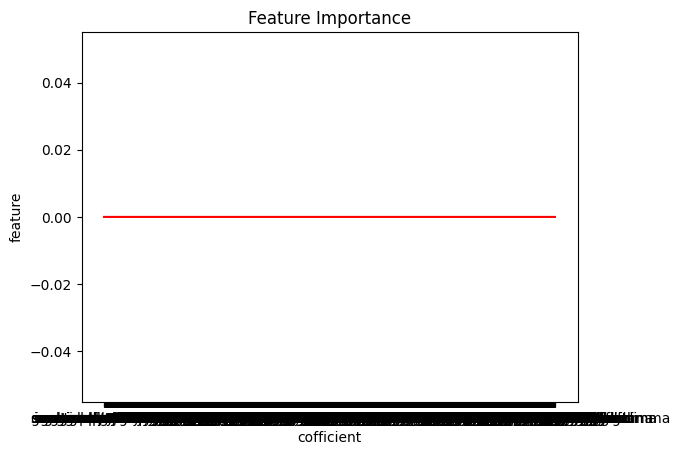

In [529]:
#Visualise Feature Importance
features = list(feature_importance.keys())
coefficients = list(feature_importance.values())

plt.plot(features,coefficients, color='red')
plt.xlabel('cofficient')
plt.ylabel('feature')
plt.title('Feature Importance')
plt.show()


In [530]:
# training for decision tree model
from sklearn.tree import DecisionTreeClassifier

In [531]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict_proba(X_val)[:,1]
roc_auc_score_dt =roc_auc_score(y_val,y_pred_dt)

In [532]:
#training using randomforest model
from sklearn.ensemble import RandomForestClassifier

In [533]:
rf = RandomForestClassifier(n_estimators=10,max_depth=5, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_val)[:,1]
roc_auc_score_rf=roc_auc_score(y_val,y_pred_rf)

In [534]:
#training using XGBoost
import xgboost as xgb

In [535]:
X_train.dtype, X_val.dtype

(dtype('float64'), dtype('float64'))

In [536]:
y_train.dtype, y_val.dtype

(dtype('O'), dtype('O'))

In [537]:
y_train = (y_train =='Yes').astype(int)
y_val = (y_val=='Yes').astype(int)

In [538]:
feature_names = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names= feature_names)
dval = xgb.DMatrix(X_val,label=y_val, feature_names=feature_names)

In [539]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [540]:
#parameters for xgboost model
#Baseline Model

xgb_params = {
    'max_depth': 6,
    'verbosity': 1,
    'eta': 0.3,
    'eval_metric': 'auc',
    'min_child_weight': 1,
    'objective':'binary:logistic',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, num_boost_round=200, verbose_eval=2, early_stopping_rounds=10)

[0]	train-auc:0.86820	val-auc:0.82475
[2]	train-auc:0.88496	val-auc:0.83436
[4]	train-auc:0.89681	val-auc:0.83759
[6]	train-auc:0.90561	val-auc:0.83486
[8]	train-auc:0.91723	val-auc:0.83713
[10]	train-auc:0.92433	val-auc:0.83544
[12]	train-auc:0.93030	val-auc:0.83480
[13]	train-auc:0.93092	val-auc:0.83501


In [541]:
y_pred_xgb = model.predict(dval)
roc_auc_score_xgb=roc_auc_score(y_val,y_pred_xgb)
roc_auc_score_xgb

0.8349344380677284

In [542]:
print('Best Iteration', model.best_iteration)
print('Best Score', '%.4f' %(model.best_score))

Best Iteration 4
Best Score 0.8376


In [543]:
#Choosing the best model then carry out parameter tuning to improve performance
print('###############')
print('roc_score of models used for training...')
print('LogisticRegression:', roc_auc_score_lr.round(4))
print('DecisionTreeClassifier:', roc_auc_score_dt.round(4))
print('RandomForest:', roc_auc_score_rf.round(4))
print('XGBoost:', roc_auc_score_xgb.round(4))
print('###############')

###############
roc_score of models used for training...
LogisticRegression: 0.5973
DecisionTreeClassifier: 0.8168
RandomForest: 0.7297
XGBoost: 0.8349
###############


In [544]:
from sklearn.model_selection import GridSearchCV

Best Model Used: XGBoost

In [545]:
#Hyperparameter tuning

param_grid = {
    'max_depth': [3,5,7,10],
    'eta': [0.05,0.1,0.3,0.5,1.0],
    'min_child_weight': [3,5,7],
}

xgb_tune_model = xgb.XGBClassifier(objective='binary:logistic')

gs = GridSearchCV(xgb_tune_model, param_grid, cv=3, scoring='roc_auc', verbose=1)
gs.fit(X_train,y_train)

gs.best_params_


Fitting 3 folds for each of 60 candidates, totalling 180 fits


{'eta': 0.1, 'max_depth': 3, 'min_child_weight': 3}

In [546]:
gs.best_estimator_ #eta = 0.1, max_depth = 3, min_child_weight = 3

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [547]:
#Test model

test_dicts = data_test.to_dict(orient = 'records')
X_test = dv.transform(test_dicts)
model = gs.best_estimator_
y_pred = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test,y_pred)
auc.round(3)

0.879

In [548]:
import pickle

Model Deployment

In [549]:
output_file = 'model.bin'
model.save_model(output_file)
output_file

C:\Users\SOOQ ELASER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:27:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


'model.bin'

In [550]:
file_out = open(output_file, 'wb')
pickle.dump((dv,model), file_out)
file_out.close()

In [551]:
with open(output_file, 'wb') as file_out:
    pickle.dump((dv,model), file_out)

In [552]:
data_train.iloc[10].to_dict()

{'rownumber': 9776,
 'customerid': 15744041,
 'surname': 'Yobanna',
 'creditscore': 780,
 'geography': 'France',
 'gender': 'Female',
 'age': 26,
 'tenure': 3,
 'balance': 140356.7,
 'numofproducts': 1,
 'hascrcard': 'Yes',
 'isactivemember': 'No',
 'estimatedsalary': 117144.15}

In [553]:
input_data = {
    "rownumber": 9776,
    "customerid": 15744041,
    "surname": "Yobanna",
    "creditscore": 780,
    "geography": "France",
    "gender": "Female",
    "age": 26,
    "tenure": 3,
    "balance": 140356.7,
    "numofproducts": 1,
    "hascrcard": "Yes",
    "isactivemember": "No",
    "estimatedsalary": 117144.15
}